<a href="https://colab.research.google.com/github/AndAmir/Pneumonia-Classification-Model/blob/master/Pneumonia_Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install "torch==1.4" "torchvision==0.5.0"

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate
from pathlib import Path

In [3]:
p = Path('/content/drive/My Drive/Pneumonia Xray Dataset/train')

In [4]:
bs = 64

In [5]:
fnames = get_image_files(p)

In [6]:
fnames[:5]

[PosixPath('/content/drive/My Drive/Pneumonia Xray Dataset/train/PENUMONIA (757).jpeg'),
 PosixPath('/content/drive/My Drive/Pneumonia Xray Dataset/train/PENUMONIA (664).jpeg'),
 PosixPath('/content/drive/My Drive/Pneumonia Xray Dataset/train/PENUMONIA (714).jpeg'),
 PosixPath('/content/drive/My Drive/Pneumonia Xray Dataset/train/PENUMONIA (684).jpeg'),
 PosixPath('/content/drive/My Drive/Pneumonia Xray Dataset/train/PENUMONIA (669).jpeg')]

In [7]:
pat = r'\/([^\/]+) \('

In [8]:
data = ImageDataBunch.from_name_re(p, fnames, pat, ds_tfms=get_transforms(), size=299, bs=bs).normalize(imagenet_stats)

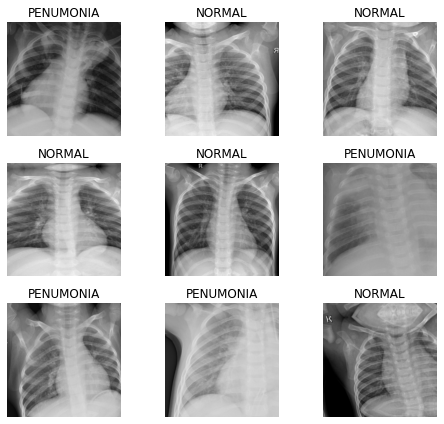

In [9]:
data.show_batch(rows=3, figsize=(7,6))

In [10]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [11]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.509868,0.555658,0.146959,02:34
1,0.347439,0.217972,0.067568,02:35
2,0.263634,0.199840,0.079392,02:34
3,0.223244,0.142420,0.059122,02:35


In [16]:
learn.save('stage-1')

In [ ]:
learn.load('stage-1-50')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


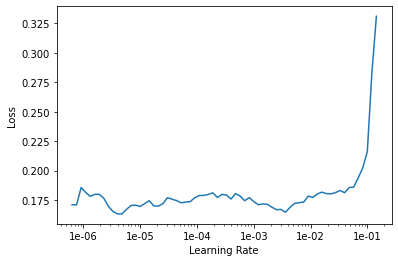

In [21]:
learn.lr_find()
learn.recorder.plot()

In [22]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.170298,0.150491,0.059122,02:38
1,0.148899,0.124125,0.045608,02:36
2,0.124934,0.088635,0.038851,02:35


In [23]:
learn.save('stage-2')